In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import meteostat
import datetime


In [3]:
full_meta_data = pd.read_csv('/Users/michael/Git/Outdoor_microbiome/Local_analysis/Plates_1_to_4_metadata.csv')
full_meta_data = full_meta_data.set_index('filename', drop = True)
full_meta_data = full_meta_data.drop_duplicates()
full_meta_data['Experiment Type'] = full_meta_data['timepoint'].str.split('t').str[0]
full_meta_data = full_meta_data.replace('', 'Long Term')
full_meta_data = full_meta_data.replace('c1_', 'Circadian Experiment 1')
full_meta_data = full_meta_data.replace('c2_', 'Circadian Experiment 2')
full_meta_data['Sample Month'] = full_meta_data['date'].str.split('/').str[0]
full_meta_data = full_meta_data.replace({'11':'November', '12':'December', '1':'January', '2':'February', '3':'March', '4':'April'})
full_meta_data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michael/Git/Outdoor_microbiome/Local_analysis/Plates_1_to_4_metadata.csv'

In [ ]:
rows_to_drop_expression_data = ['A2450525897_n01_LICRNA01_D12',
                'A2450525897_n01_undetermined',
                'A2449446903_n01_undetermined',
                'B250508004_n01_undetermined',
                'B2449500127_n01_undetermined']

rows_to_drop_meta_data = ['A2450525897_n01_LICRNA01_D12']

In [ ]:
expression_data = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)

expression_data = expression_data.drop(index=rows_to_drop_expression_data)

expression_data = expression_data.dropna(how="all", axis=0)
expression_data = expression_data.dropna(how="all", axis=1)
full_meta_data = full_meta_data.drop(index = 'A2450525897_n01_LICRNA01_D12')


In [ ]:
full_meta_data = full_meta_data.sort_index()
expression_data = expression_data.sort_index()
full_meta_data


,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col,Total Reads,Unmapped Over Mapped,Experiment Type,Sample Month
filename,,,,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,1,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,285983.0,82176.0,103821.0,14939.0,A,1,1246970.0,0.608101,Long Term,January
A2449446903_n01_LICRNA02_A02,A02,9,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,648887.0,353549.0,398670.0,57289.0,A,2,4985602.0,0.616150,Long Term,January
A2449446903_n01_LICRNA02_A03,A03,17,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,386660.0,158864.0,207527.0,27420.0,A,3,2465662.0,0.492216,Long Term,February
A2449446903_n01_LICRNA02_A04,A04,25,LIC205,plant,t18,2/6/24,8:00,LIC_03,LICRNA_02,306394.0,132266.0,39209.0,46310.0,6783.0,A,4,564891.0,0.542395,Long Term,February
A2449446903_n01_LICRNA02_A05,A05,33,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,170807.0,90929.0,125368.0,19337.0,A,5,1515395.0,0.860130,Long Term,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,H08,64,LIC428,plant,c1_t04,2/10/24,8:00,LICCIRC_01,LICRNA_03,2552177.0,653299.0,438552.0,460177.0,61087.0,H,8,5245242.0,0.486570,Circadian Experiment 1,February
B250508004_n01_LICRNA03_H09,H09,72,LIC440,plant,c1_t05,2/10/24,12:00,LICCIRC_01,LICRNA_03,4228242.0,1225936.0,493699.0,645602.0,93443.0,H,9,7715482.0,0.548020,Circadian Experiment 1,February
B250508004_n01_LICRNA03_H10,H10,80,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,LICRNA_03,365095.0,119463.0,39090.0,55347.0,7763.0,H,10,643786.0,0.567106,Circadian Experiment 1,February


In [ ]:
full_meta_data[49:100]

,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col,Total Reads,Unmapped Over Mapped,Experiment Type,Sample Month
filename,,,,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_E02,E02,13,LIC173,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,2654140.0,717431.0,333308.0,360223.0,51956.0,E,2,4439426.0,0.597857,Long Term,January
A2449446903_n01_LICRNA02_E03,E03,21,LIC197,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,4101044.0,800490.0,533106.0,490402.0,73676.0,E,3,5634545.0,0.727839,Long Term,February
A2449446903_n01_LICRNA02_E04,E04,29,LIC209,plant,t18,2/6/24,8:00,LIC_03,LICRNA_02,1611086.0,456247.0,246037.0,294043.0,42841.0,E,4,3708986.0,0.434374,Long Term,February
A2449446903_n01_LICRNA02_E05,E05,37,LIC221,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,8275641.0,1217554.0,775014.0,732400.0,117701.0,E,5,8794144.0,0.941040,Long Term,February
A2449446903_n01_LICRNA02_E06,E06,45,LIC233,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1492358.0,421149.0,237035.0,201238.0,32927.0,E,6,2434757.0,0.612939,Long Term,February
A2449446903_n01_LICRNA02_E07,E07,53,LIC245,plant,t21,2/20/24,8:00,LIC_03,LICRNA_02,11738506.0,1479828.0,843365.0,683876.0,105567.0,E,7,8147084.0,1.440823,Long Term,February
A2449446903_n01_LICRNA02_E08,E08,61,LIC257,plant,t22,2/23/24,8:00,LIC_03,LICRNA_02,2844142.0,456709.0,402075.0,250157.0,45821.0,E,8,3084479.0,0.922082,Long Term,February
A2449446903_n01_LICRNA02_E09,E09,69,LIC269,plant,t23,2/26/24,8:00,LIC_03,LICRNA_02,4594369.0,796450.0,553514.0,425070.0,67262.0,E,9,5413707.0,0.848655,Long Term,February
A2449446903_n01_LICRNA02_E10,E10,77,LIC293,plant,t25,3/5/24,8:00,LIC_04,LICRNA_02,1423169.0,378134.0,189051.0,172109.0,29084.0,E,10,2261500.0,0.629303,Long Term,March


In [ ]:
pca = sklearn.decomposition.PCA(n_components = 5).fit_transform(expression_data)
pca

array([[-18067.16841065,  -7126.00838212,   1781.91491706,
         -4658.42744748, -10288.33659797],
       [ 43315.11459608,   1266.80334388,   2484.27817091,
         -2410.22080227,  -2614.30669662],
       [ 60647.40107179,   4256.94078084,   2866.73489884,
         -3151.45447488,  -4843.4307534 ],
       ...,
       [ 28251.05217668, -32947.17100134,  -2641.77840505,
         -8072.75750953,    396.67725327],
       [-61540.86639997, -13594.43295094,  -1388.45000859,
        -16416.60113185,   1078.40047778],
       [  8842.68867755,  33204.8312231 ,   3559.75507865,
           965.44029451,   3751.39209847]], shape=(383, 5))

(array([-250000., -200000., -150000., -100000.,  -50000.,       0.,
          50000.,  100000.,  150000.,  200000.]),
 [Text(0, -250000.0, '−250000'),
  Text(0, -200000.0, '−200000'),
  Text(0, -150000.0, '−150000'),
  Text(0, -100000.0, '−100000'),
  Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000')])

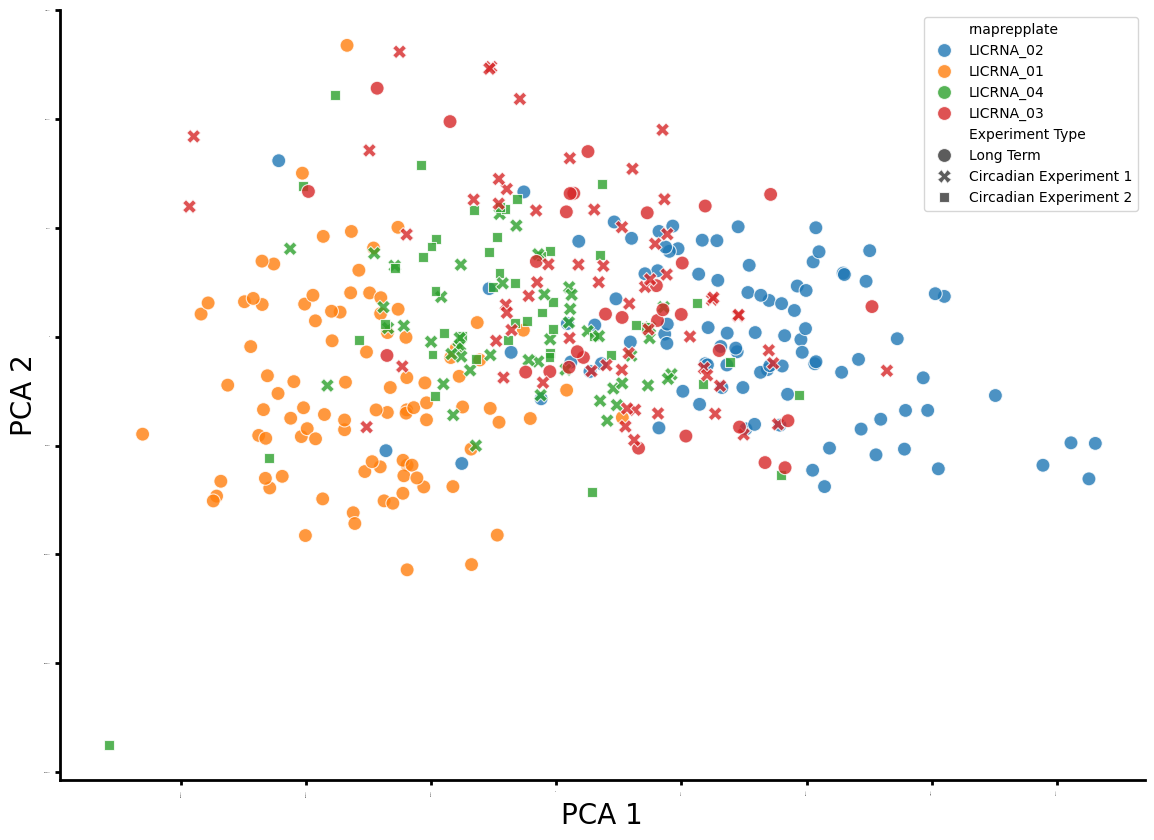

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=pca[:, 0],
    y=pca[:, 1],
    hue=full_meta_data["rnaprepplate"],
    style=full_meta_data["Experiment Type"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

# plt.ylim(0,10)

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_46664/1146400757.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_meta_data['plate.pos'][line], horizontalalignment='left',


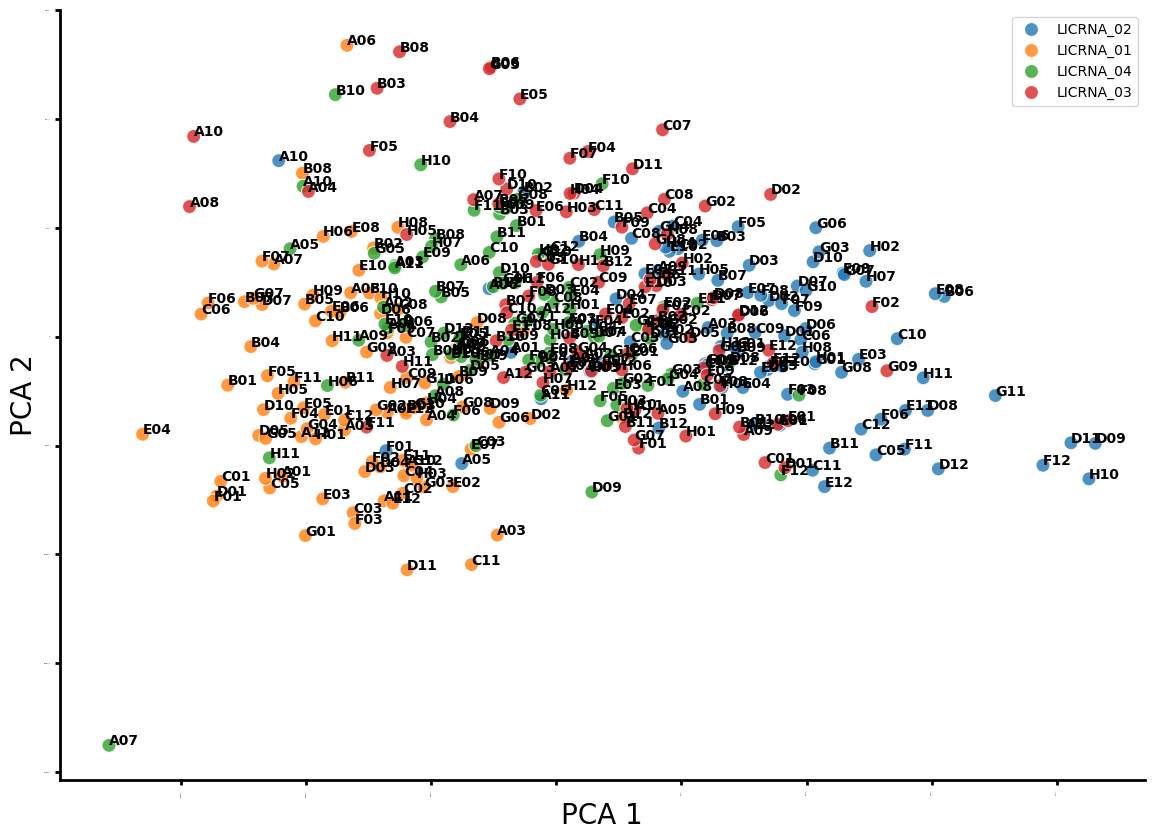

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=pca[:, 0],
    y=pca[:, 1],
    hue=full_meta_data["rnaprepplate"],
    #style=full_meta_data["Time"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
for line in range(0,full_meta_data.shape[0]):
     ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
     full_meta_data['plate.pos'][line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

# plt.ylim(0,10)

(array([-250000., -200000., -150000., -100000.,  -50000.,       0.,
          50000.,  100000.,  150000.,  200000.]),
 [Text(0, -250000.0, '−250000'),
  Text(0, -200000.0, '−200000'),
  Text(0, -150000.0, '−150000'),
  Text(0, -100000.0, '−100000'),
  Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000')])

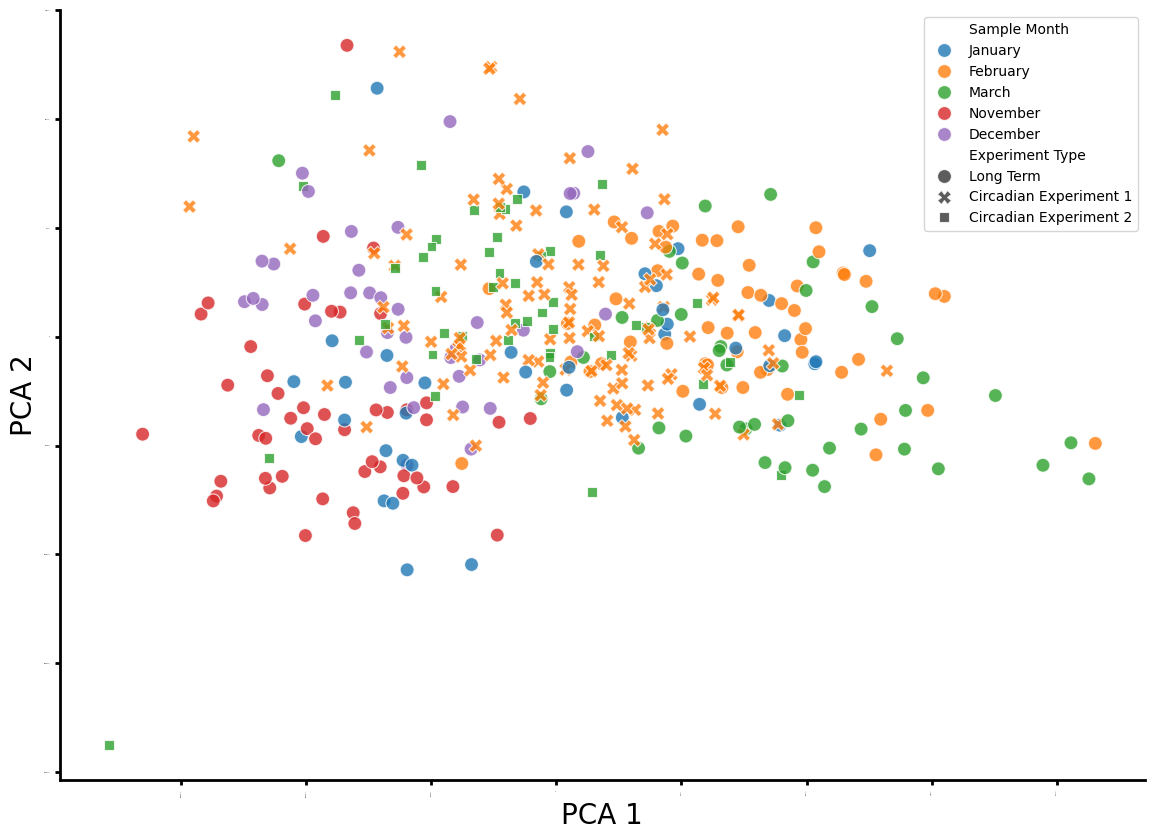

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=pca[:, 0],
    y=pca[:, 1],
    hue=full_meta_data["Sample Month"],
    style=full_meta_data["Experiment Type"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

# plt.ylim(0,10)

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_46664/3229330379.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_meta_data['plate.pos'][line], horizontalalignment='left',


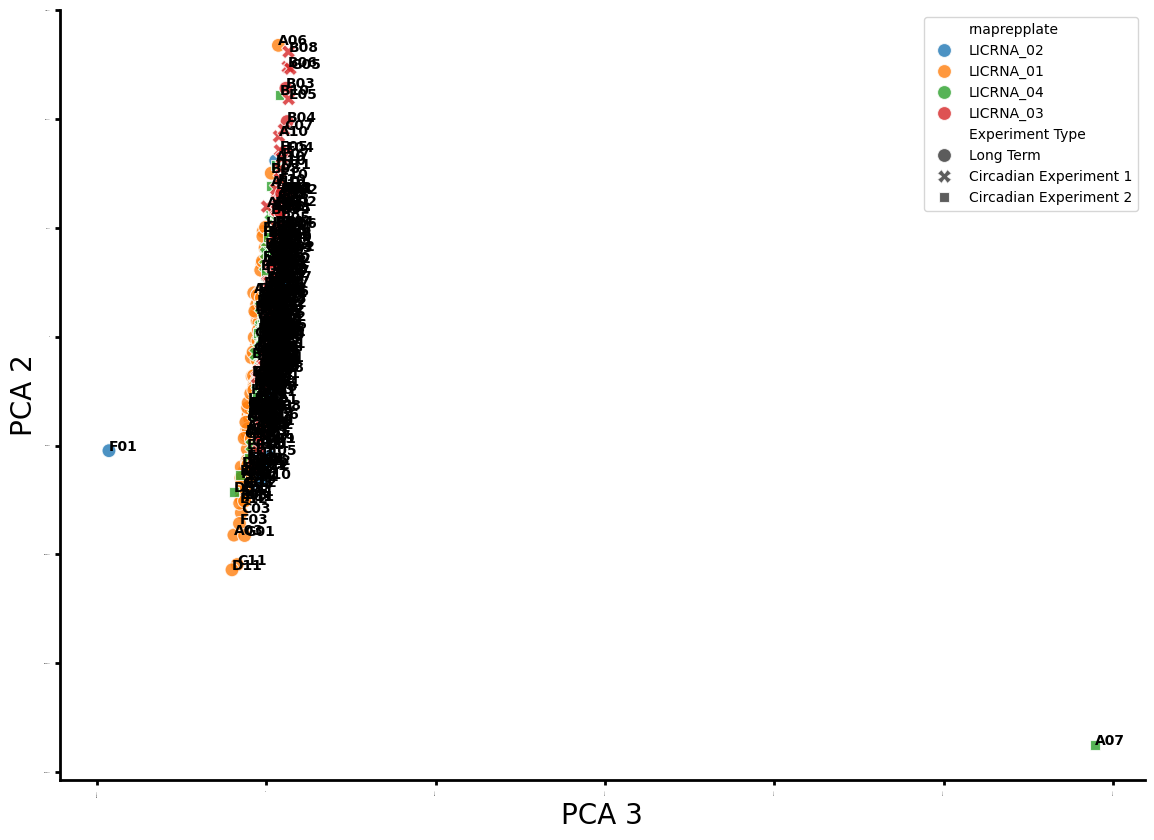

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=pca[:, 2],
    y=pca[:, 1],
    hue=full_meta_data["rnaprepplate"],
    style=full_meta_data["Experiment Type"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 3", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
#ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
for line in range(0,full_meta_data.shape[0]):
     ax.text(pca[:,2][line]+0.01, pca[:,1][line], 
     full_meta_data['plate.pos'][line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

# plt.ylim(0,10)

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_46664/2370823300.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_meta_data['plate.pos'][line], horizontalalignment='left',


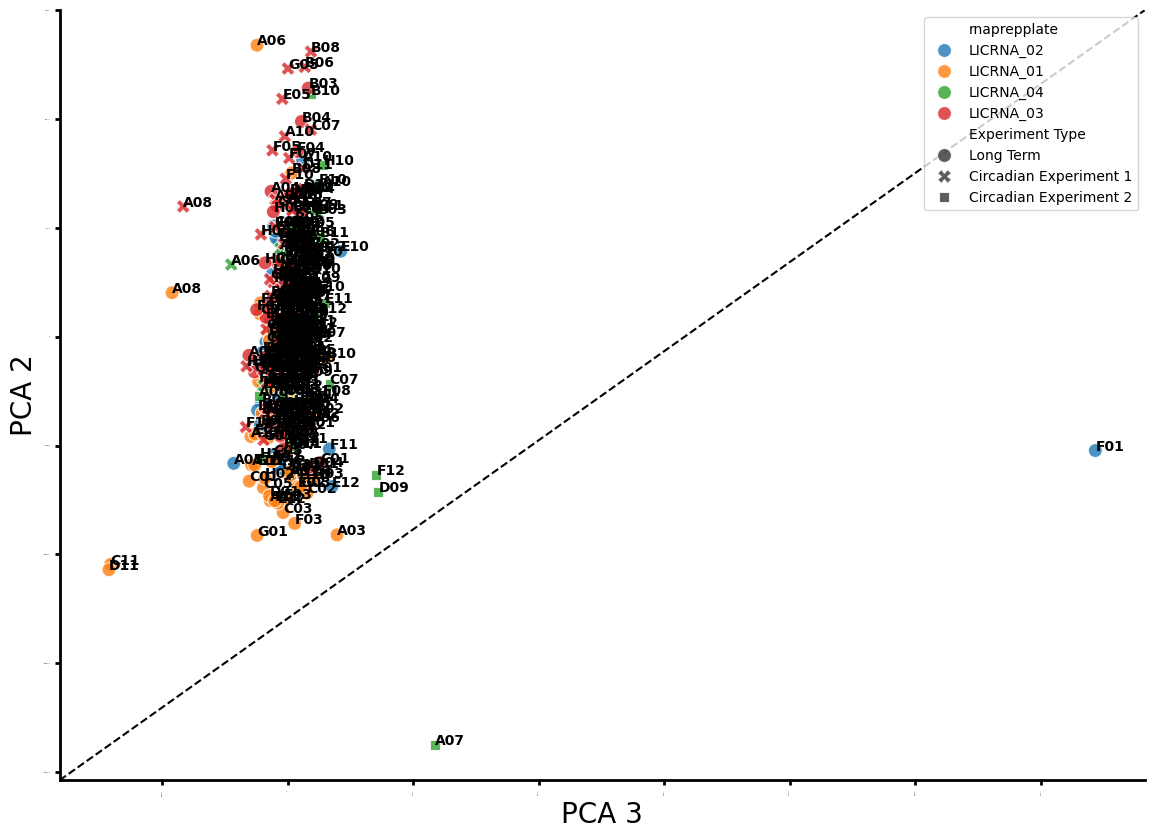

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=pca[:, 3],
    y=pca[:, 1],
    hue=full_meta_data["rnaprepplate"],
    style=full_meta_data["Experiment Type"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 3", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
for line in range(0,full_meta_data.shape[0]):
     ax.text(pca[:,3][line]+0.01, pca[:,1][line], 
     full_meta_data['plate.pos'][line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

# plt.ylim(0,10)

In [4]:
## Things to check - days from germination, time of sampling, weather data impact (temp, humidity, time since last rain, ) correlation of Luke data with weather data
## Worries -correlation of weather and time from germination, correlation of 

In [5]:
stations_nearby_NYU = meteostat.Stations().nearby(40.73005, -73.99450)
stations_nearby_NYU.fetch(5)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
KJRB0,New York / Wall Street,US,NY,<NA>,KJRB,40.7012,-74.0090,2.0,America/New_York,2016-07-20,2025-09-30,2016-07-21,2022-04-24,2019-01-01,2021-01-01,3432.864371
72502,Newark Airport,US,NJ,72502,KEWR,40.6833,-74.0000,5.0,America/New_York,1973-01-01,2025-09-30,1843-05-01,2025-10-02,1893-01-01,2022-01-01,5218.994898
KNYC0,New York City / Yorkville,US,NY,<NA>,KNYC,40.7789,-73.9692,3.0,America/New_York,1943-12-01,2025-09-30,1943-12-02,2022-04-24,1944-01-01,2021-01-01,5834.951677
KTEB0,Teterboro,US,NJ,<NA>,KTEB,40.8501,-74.0608,3.0,America/New_York,1973-01-01,2025-09-30,1973-01-01,2022-04-24,2005-01-01,2022-01-01,14468.876601
74486,John F. Kennedy Airport,US,NY,74486,KJFK,40.6333,-73.7667,4.0,America/New_York,1973-01-01,2025-09-30,1948-07-17,2025-10-03,1948-01-01,2022-01-01,22016.387511


In [6]:
start_time = datetime.datetime(2023,11,1)
end_time = datetime.datetime(2024,4,30)
luke_apt_point = meteostat.Point(40.73005, -73.99450)
luke_hourly_data = meteostat.Hourly(luke_apt_point,start_time, end_time).fetch()

In [7]:
luke_hourly_data['prcp'].value_counts().head(20)

prcp
0.0    3742
0.2      83
0.3      59
0.4      50
0.1      49
0.5      46
0.7      31
1.0      26
0.6      23
0.9      22
0.8      21
1.2      15
1.1      12
1.5      12
1.3      12
2.0      10
2.5      10
2.3       9
1.8       8
2.7       7
Name: count, dtype: Int64

In [8]:
luke_hourly_data[2400:2450]

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2024-02-09 00:00:00,6.1,-0.6,62.0,0.0,<NA>,153.0,5.4,<NA>,1025.0,<NA>,3.0
2024-02-09 01:00:00,6.1,-0.6,62.0,0.0,<NA>,166.0,7.6,<NA>,1024.7,<NA>,3.0
2024-02-09 02:00:00,6.7,-0.1,62.0,0.0,<NA>,158.0,9.4,<NA>,1024.5,<NA>,3.0
2024-02-09 03:00:00,6.1,0.6,68.0,0.0,<NA>,168.0,5.4,<NA>,1024.6,<NA>,3.0
2024-02-09 04:00:00,6.1,1.6,73.0,0.0,<NA>,240.0,5.4,<NA>,1024.6,<NA>,3.0
2024-02-09 05:00:00,5.6,1.1,73.0,0.0,<NA>,240.0,11.2,<NA>,1024.7,<NA>,3.0
2024-02-09 06:00:00,5.0,0.6,73.0,0.0,<NA>,220.0,5.4,<NA>,1024.0,<NA>,3.0
2024-02-09 07:00:00,5.6,-0.7,64.0,0.2,<NA>,0.0,0.0,<NA>,1022.6,<NA>,19.0
2024-02-09 08:00:00,5.6,-1.1,62.0,0.0,<NA>,0.0,0.0,<NA>,1022.6,<NA>,3.0


In [45]:
luke_hourly_data.tail(50)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2024-04-27 23:00:00,11.1,-0.1,46.0,0.0,<NA>,200.0,18.4,<NA>,1029.8,<NA>,3.0
2024-04-28 00:00:00,11.1,2.1,54.0,0.0,<NA>,180.0,11.2,<NA>,1029.3,<NA>,3.0
2024-04-28 01:00:00,11.1,4.3,63.0,0.0,<NA>,180.0,13.0,<NA>,1029.1,<NA>,3.0
2024-04-28 02:00:00,10.6,5.6,71.0,0.0,<NA>,190.0,7.6,<NA>,1029.2,<NA>,3.0
2024-04-28 03:00:00,10.6,5.6,71.0,0.0,<NA>,180.0,9.4,<NA>,1028.4,<NA>,3.0
2024-04-28 04:00:00,10.6,4.9,68.0,0.2,<NA>,190.0,9.4,<NA>,1027.8,<NA>,7.0
2024-04-28 05:00:00,10.6,5.6,71.0,0.1,<NA>,200.0,9.4,<NA>,1027.0,<NA>,7.0
2024-04-28 06:00:00,10.0,6.2,77.0,0.0,<NA>,220.0,9.4,<NA>,1026.4,<NA>,3.0
2024-04-28 07:00:00,10.0,7.2,83.0,0.0,<NA>,0.0,0.0,<NA>,1025.6,<NA>,3.0


In [51]:
luke_self_collected_temp = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/lic_temp_540000007D5FFE41_031824.csv', skiprows= 19)
luke_self_collected_temp

,Date/Time,Unit,Value
0,11/13/23 6:28:01 PM,C,26.621
1,11/13/23 8:28:01 PM,C,20.117
2,11/13/23 10:28:01 PM,C,8.085
3,11/14/23 12:28:01 AM,C,7.081
4,11/14/23 2:28:01 AM,C,6.579
...,...,...,...
1507,3/18/24 9:28:01 AM,C,17.613
1508,3/18/24 11:28:01 AM,C,21.119
1509,3/18/24 1:28:01 PM,C,22.620
1510,3/18/24 3:28:01 PM,C,22.620


In [52]:
luke_time_data_format = "%-m/%-d/%y %-I:%-M:%S %p"
luke_self_collected_temp['Date and Time'] = datetime.datetime.strptime(luke_self_collected_temp['Date/Time'][0], luke_time_data_format)
luke_self_collected_temp

,Date/Time,Unit,Value,Date and Time
0,11/13/23 6:28:01 PM,C,26.621,2023-11-13 18:28:01
1,11/13/23 8:28:01 PM,C,20.117,2023-11-13 18:28:01
2,11/13/23 10:28:01 PM,C,8.085,2023-11-13 18:28:01
3,11/14/23 12:28:01 AM,C,7.081,2023-11-13 18:28:01
4,11/14/23 2:28:01 AM,C,6.579,2023-11-13 18:28:01
...,...,...,...,...
1507,3/18/24 9:28:01 AM,C,17.613,2023-11-13 18:28:01
1508,3/18/24 11:28:01 AM,C,21.119,2023-11-13 18:28:01
1509,3/18/24 1:28:01 PM,C,22.620,2023-11-13 18:28:01
1510,3/18/24 3:28:01 PM,C,22.620,2023-11-13 18:28:01


In [40]:
start_time

datetime.datetime(2023, 11, 1, 0, 0)